In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
country_list_x = ['FR','PL','DK','AT'] #Germany,Denmark ,Sweden 
country_list_y = ['FR','PL','DK','AT']
radiation_data_list = []

In [3]:
# energygenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)
wind_gen_list = []
for i in country_list_x:
    i = i+"_wind_onshore_generation"
    wind_gen_dat = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 (s. startswith(i))),
                        parse_dates=[0], index_col=0)# wind generation is measured in MW
    wind_gen_list.append(wind_gen_dat)


In [4]:
print(wind_gen_list)

[                           FR_wind_onshore_generation_actual
utc_timestamp                                               
2004-12-31 23:00:00+00:00                                NaN
2005-01-01 00:00:00+00:00                                NaN
2005-01-01 01:00:00+00:00                                NaN
2005-01-01 02:00:00+00:00                                NaN
2005-01-01 03:00:00+00:00                                NaN
...                                                      ...
2019-04-30 19:00:00+00:00                                NaN
2019-04-30 20:00:00+00:00                                NaN
2019-04-30 21:00:00+00:00                                NaN
2019-04-30 22:00:00+00:00                                NaN
2019-04-30 23:00:00+00:00                                NaN

[125593 rows x 1 columns],                            PL_wind_onshore_generation_actual
utc_timestamp                                               
2004-12-31 23:00:00+00:00                               

In [5]:
# weatherdata = pd.read_csv("data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [6]:
windspeed_list =[]
for i in country_list_y:
    i = i + "_windspeed"
    windspeed = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith(i)),
                parse_dates=[0], index_col=0)
    print(windspeed)
    windspeed_list.append(windspeed)

                           FR_windspeed_10m
utc_timestamp                              
1980-01-01 00:00:00+00:00              2.67
1980-01-01 01:00:00+00:00              2.58
1980-01-01 02:00:00+00:00              2.52
1980-01-01 03:00:00+00:00              2.49
1980-01-01 04:00:00+00:00              2.48
...                                     ...
2016-12-31 19:00:00+00:00              2.42
2016-12-31 20:00:00+00:00              2.55
2016-12-31 21:00:00+00:00              2.62
2016-12-31 22:00:00+00:00              2.69
2016-12-31 23:00:00+00:00              2.74

[324360 rows x 1 columns]
                           PL_windspeed_10m
utc_timestamp                              
1980-01-01 00:00:00+00:00              3.57
1980-01-01 01:00:00+00:00              3.50
1980-01-01 02:00:00+00:00              3.49
1980-01-01 03:00:00+00:00              3.47
1980-01-01 04:00:00+00:00              3.34
...                                     ...
2016-12-31 19:00:00+00:00              5.68
2016-

In [7]:
print(len(windspeed_list))
for i in range(0,2):
    print(windspeed_list[i])

4
                           FR_windspeed_10m
utc_timestamp                              
1980-01-01 00:00:00+00:00              2.67
1980-01-01 01:00:00+00:00              2.58
1980-01-01 02:00:00+00:00              2.52
1980-01-01 03:00:00+00:00              2.49
1980-01-01 04:00:00+00:00              2.48
...                                     ...
2016-12-31 19:00:00+00:00              2.42
2016-12-31 20:00:00+00:00              2.55
2016-12-31 21:00:00+00:00              2.62
2016-12-31 22:00:00+00:00              2.69
2016-12-31 23:00:00+00:00              2.74

[324360 rows x 1 columns]
                           PL_windspeed_10m
utc_timestamp                              
1980-01-01 00:00:00+00:00              3.57
1980-01-01 01:00:00+00:00              3.50
1980-01-01 02:00:00+00:00              3.49
1980-01-01 03:00:00+00:00              3.47
1980-01-01 04:00:00+00:00              3.34
...                                     ...
2016-12-31 19:00:00+00:00              5.68
201

In [8]:
#creating training data but cutting the data based on time stamp
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]


# training and data set

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-12-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove) & (windspeed.index < end_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_test = pd.to_datetime('2016-12-01')
# end_test = pd.to_datetime('2017-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]
#Creating data for multiple models
windspeedtrain = []
windspeedtest = []
windgentrain =[]
windgentest = []
start_remove = pd.to_datetime('2016-01-01',utc=True)
end_remove = pd.to_datetime('2017-01-01',utc=True)
for i in range(0,len(windspeed_list)): #Create xtrain
    current_item = windspeed_list[i]
    windspeedtrain.append(current_item.loc[(current_item.index >= start_remove) & (current_item.index < end_remove)])

for i in range(0,len(windspeed_list)): #Create ytrain
    current_item = wind_gen_list[i]
    windgentrain.append(current_item.loc[(current_item.index >= start_remove) & (current_item.index < end_remove)])

start_test = pd.to_datetime('2015-01-01',utc=True)
end_test = pd.to_datetime('2016-01-01',utc=True)

for i in range(0,len(windspeed_list)): # Create xtest
    current_item = windspeed_list[i]
    windspeedtest.append(current_item.loc[(current_item.index >= start_test) & (current_item.index < end_test)])

for i in range(0,len(windspeed_list)): # Create ytest
    current_item = windspeed_list[i]
    windgentest.append(current_item.loc[(current_item.index >= start_test) & (current_item.index < end_test)])


In [9]:

#windspeedformatted.replace([np.inf, -np.inf], 0)

In [10]:
#creating test/comparison data
# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [11]:
#windspeedformatted.dtypes

In [12]:
#windgenerationdataformatted

In [13]:
#max(windgenerationdataformatted['DE_wind_generation_actual'])

In [14]:
#min(windgenerationdataformatted['DE_wind_generation_actual'])

In [15]:
#windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [16]:
#windgenerationtest = windgenerationtest * 1e-3

In [17]:
#windgenerationtest

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
#train test might not be valid for our case because we have timestamps in play
# xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [20]:
#inital model training attempt
# model = LinearRegression().fit(xtr,ytr)
# predicted = model.predict(windspeedformatted)

In [21]:
#attempt at cross validation
# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [22]:
#predict using train test split data
# predicted = model.predict(xts)

In [23]:
# predicted

In [24]:
#error when using model from cross validation
# predicted = model.predict(windspeedformatted)

In [25]:
#timeseries used as x axis when plotting predicted
# timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [26]:
# timeseries

In [27]:
# windgenerationdataformatted.plot(linewidth=0.5)

In [28]:
# I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
# plt.plot(timeseries,predicted, linewidth=0.5)

In [29]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN.
No wind data past 2016
Only valid times for dataset is 2015-01-01 to 2017

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''

'\nTodo:\ntake in weather data and generation data\nseparate data into two sets:\nSolar\nX = [sun related weather columns] \nY = wind_generation_actual\nWind:\nX = [wind related weather columns] \nY = sun_generation_actual\n\nTrim data based on timestamp\nWind generation begins at 2010-01-01\nHowever there are values with NaN.\nNo wind data past 2016\nOnly valid times for dataset is 2015-01-01 to 2017\n\nSolar generation begins at 2012-01-01\n\nTo try: if there are timestamps do I have to format data?\n'

In [30]:
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [31]:
timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [32]:
for i in range (0,4):

    windspeedtest[i] = windspeedtest[i].rename({"utc_timestamp": "timestamp", country_list_x[i]+"_windspeed_10m": "windspeed"}, axis='columns')

In [33]:
for i in range (0,4):

    windspeedtrain[i] = windspeedtrain[i].rename({"utc_timestamp": "timestamp", country_list_x[i]+"_windspeed_10m": "windspeed"}, axis='columns')

In [34]:
for i in range (0,4):

    windgentrain[i] = windgentrain[i].rename({"utc_timestamp": "timestamp", country_list_y[i]+"_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [35]:
for i in range(0,4):
    windgentest[i] = windgentest[i].rename({"utc_timestamp": "timestamp", country_list_y[i]+"_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [36]:
model_list = []
for i in range (0,len(windspeedtrain)): #create multiple models
    model = LinearRegression().fit(windspeedtrain[i],windgentrain[i])
    model_list.append(model)

In [37]:
#concatenate all the data


In [38]:
prediction_list = [[],[],[],[]]
#prediction_array = np.zeros((4,4)) # Rows = Predictions per country
#Columns = Predictions per test set
for i in range (0,4):# Predict each model separately, then average the predictions
    for j in range(0,4):
        prediction = model_list[i].predict(windspeedtest[j])
        prediction_list[i].append(prediction)


In [39]:
average_pred = np.average(prediction_list, axis = 0) #Average out our predictions per country
print(np.average(prediction_list,axis = 0).shape)
average_pred = average_pred.reshape(4,8760)
print(average_pred.shape) # Has an extra dimension


(4, 8760, 1)
(4, 8760)


In [40]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')
print(timeseries.shape)

(8760,)


Energy Data measured in Giga Watts
Total energy: 12291920.884042248
Average Energy Per Hour: 1403.187315529937
Average Energy Per Day: 33676.495572718486


C:\Users\ezhu2\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


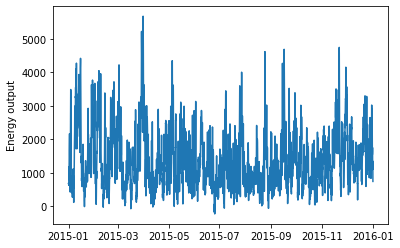

In [41]:
france_gen = average_pred[0]  #Individual countries results
plt.plot(timeseries,france_gen)
plt.ylabel('Energy output')
energy_production(france_gen)

Energy Data measured in Giga Watts
Total energy: 13756702.194102883
Average Energy Per Hour: 1570.399793847361
Average Energy Per Day: 37689.59505233667


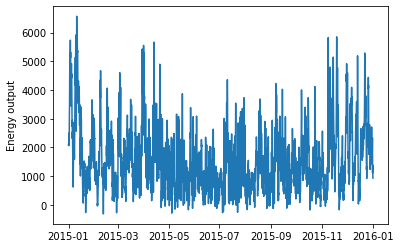

In [42]:
pol_gen = average_pred[1]  #Individual countries results
plt.plot(timeseries,pol_gen)
plt.ylabel('Energy output')
energy_production(pol_gen)

Energy Data measured in Giga Watts
Total energy: 22781729.554697774
Average Energy Per Hour: 2600.6540587554537
Average Energy Per Day: 62415.69741013089


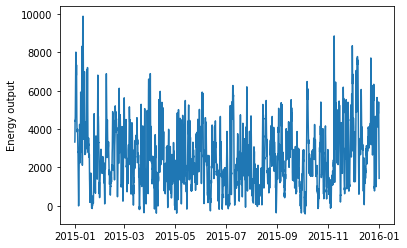

In [43]:
dk_gen = average_pred[2]  #Individual countries results
plt.plot(timeseries,dk_gen)
plt.ylabel('Energy output')
energy_production(dk_gen)

Energy Data measured in Giga Watts
Total energy: 5749078.318287896
Average Energy Per Hour: 656.2874792566091
Average Energy Per Day: 15750.89950215862


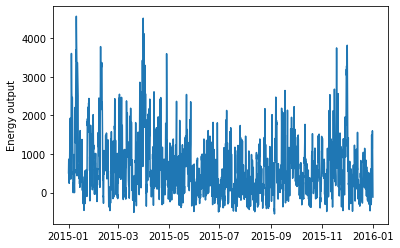

In [44]:
at_gen = average_pred[3]  #Individual countries results
plt.plot(timeseries,at_gen)
plt.ylabel('Energy output')
energy_production(at_gen)

In [45]:
from sklearn.metrics import r2_score
#print(r2_score(solargenerationtest, prediction))
for i in range(0,4):
    print(str(r2_score(windgentest[i],average_pred[i])) + " r2 score for " + country_list_x[i])

-1190793.607502474 r2 score for FR
-969014.4467554 r2 score for PL
-1194984.1619561086 r2 score for DK
-588550.7700411692 r2 score for AT


In [48]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
for i in range(0,4):
    print(str(mean_squared_error(windgentest[i],average_pred[i] )) + " mse for " + country_list_x[i] )

2702541.7329257824 mse for FR
3709300.735101649 mse for PL
9281872.747886084 mse for DK
965974.4690300861 mse for AT


In [49]:
for i in range(0,2):
    
    print(np.sum((windgentest[i]-prediction[i])**2)/(prediction[i].shape[0]))

FR_windspeed_10m    2.669881e+09
dtype: float64
PL_windspeed_10m    3.166244e+09
dtype: float64


In [ ]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''

In [ ]:
# np.where((windspeedformatted.values).dtype != np.float64)

In [ ]:
# 3.3706 != np.float64

In [ ]:
# windspeedformatted.values

In [ ]:
# windspeedformatted.values.dtype != np.float64